In [44]:
# House price prediction using regression

In [45]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
sns.set_style('whitegrid')

In [46]:
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

In [47]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [48]:
train_df.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
842,70,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,157500
1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
563,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
846,85,RL,NaN,16647,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,171000
1330,60,RL,63.0,9084,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,176500



    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


# EDA

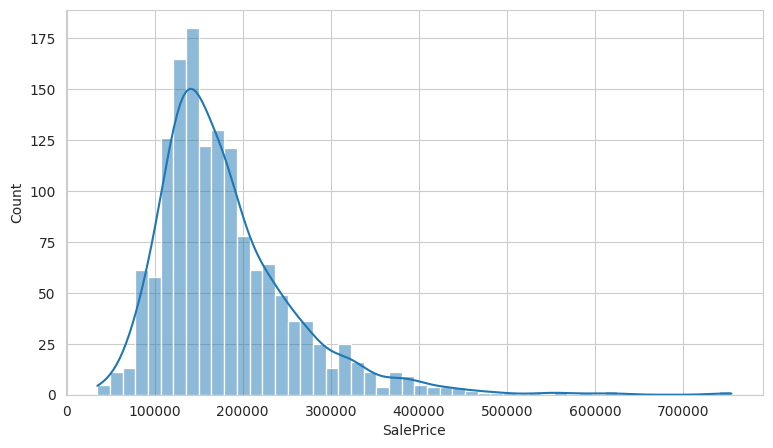

Skewness: 1.8828757597682129 


In [49]:
plt.figure(figsize=(9,5))
sns.histplot( train_df.SalePrice , kde=True, bins=50 )
plt.show()
print( f'Skewness: {train_df.SalePrice.skew()} ' )

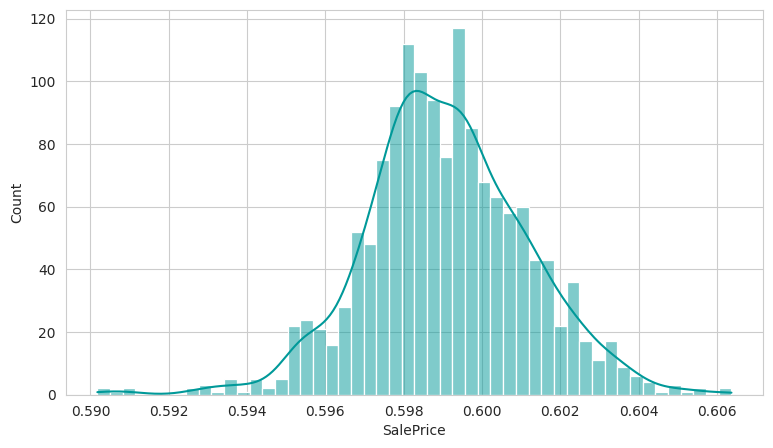

Skewness: -0.072411288962666 


In [54]:
#Log transformation on target feature

train_df.SalePrice = np.log1p(train_df.SalePrice)
plt.figure(figsize=(9,5))
sns.histplot( train_df.SalePrice , kde=True, bins=50, color='#009999' )
plt.show()
print( f'Skewness: {train_df.SalePrice.skew()} ' )

Data is closer to normal distribution after log tranformation

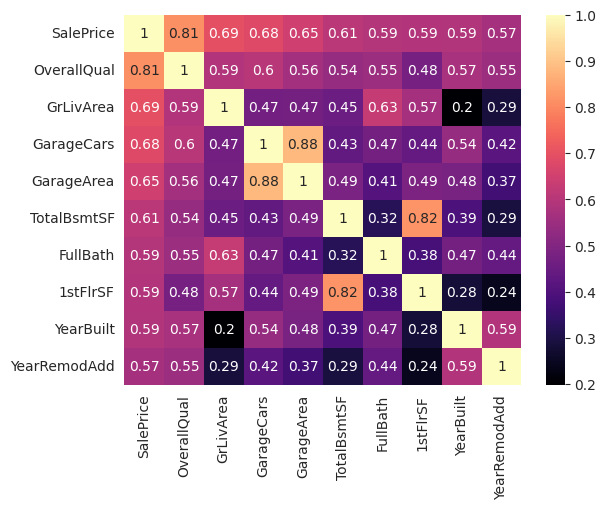

In [68]:
corr = train_df.corr( numeric_only=True )
top_corr_features = corr.nlargest( 10, 'SalePrice' )['SalePrice'].index

top_corr_mat = train_df[ top_corr_features ].corr()

sns.heatmap( top_corr_mat, annot=True, cmap='magma' )
plt.show()

# Data preprocessing

In [71]:
df = pd.concat(
    [ train_df.loc[:, :'SaleCondition'],
      test_df.loc[:, :'SaleCondition'] ]
)
print(df.shape)

(2919, 79)


In [75]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageYrBlt,159


In [76]:
numerical_cols_to_impute_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
for col in numerical_cols_to_impute_zero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [79]:
if 'LotFrontage' in df.columns and df['LotFrontage'].isna().any():
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [80]:
categorical_cols_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_cols_to_impute_none:
    if col in df.columns: # Check if column exists after one-hot encoding
        df[col] = df[col].fillna('None')

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
    if col in df.columns: # Check if column exists after one-hot encoding
        df[col] = df[col].fillna(df[col].mode()[0])

In [81]:
# Based on the likely remaining missing values (GarageYrBlt), impute the remaining numerical features.
# GarageYrBlt can be imputed with 0 (assuming 0 means no garage, consistent with GarageArea/Cars=0)
if 'GarageYrBlt' in df.columns:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


print("\nMissing values after all imputation:", df.isna().sum().sum())


Missing values after all imputation: 0


# Feature Engineering

In [83]:
#1. TotalSF
df[ 'TotalSF' ] = df['1stFlrSF'] + df['TotalBsmtSF'] + df['2ndFlrSF']

In [84]:
#2. TotalBath
df[ 'TotalBath' ] = ( df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']) )

In [85]:
#3. Age
df['Age'] = df['YrSold'] - df['YearBuilt']

In [86]:
cat_cols = df.select_dtypes( include='object' ).columns

In [89]:
df = pd.get_dummies( df, columns= cat_cols, drop_first=True )
df.shape

(2919, 262)

# Model Building and Training

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Separate the preprocessed data back into training and testing sets
X = df[:len(train_df)]
y = train_df['SalePrice'] # SalePrice was already log-transformed and is only in train_df
X_test_final = df[len(train_df):]

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # PRNG

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_val_scaled)

In [103]:
import xgboost as xgb

In [104]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Corrected objective function
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=3,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42)

# XGBoost can handle NaNs, but since we've cleaned the data, we can use the scaled data as well if preferred.
# However, XGBoost generally doesn't require scaling. We'll use the unscaled data as it's a tree-based model.
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_val)

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [107]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# evaluate_model(y_val, y_pred_lr, "Linear Regression") # Commenting out Linear Regression evaluation as it failed
evaluate_model(y_val, y_pred_xgb, "XGBoost")

--- XGBoost Performance ---
RMSE: 0.0007
MAE:  0.0005
R-squared: 0.8983



In [108]:
# Make predictions on the final test set using the best model (XGBoost)
# Use the unscaled test data for XGBoost prediction
final_predictions_log = xgbr.predict(X_test_final)

# IMPORTANT: We must reverse the log transformation to get the predictions back on the original price scale
final_predictions = np.expm1(final_predictions_log)

# Create the submission DataFrame
submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})

# Save to csv
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
submission.head()

Submission file 'submission.csv' created successfully.


,Id,SalePrice
0,1461,0.817511
1,1462,0.820357
2,1463,0.821346
3,1464,0.821902
4,1465,0.821236
